## Name - Kumar Shivam
  ### Data Science Internship
   ### CodeClause - Dec/2023

### Allocated Projects:
#### Project No. 02 - Sentiment Analysis

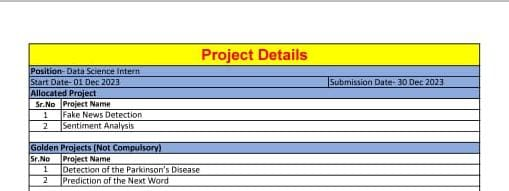

### Importing required Libraries

In [75]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [76]:
df = pd.read_csv('Reviews.csv')

### Explore the data

In [77]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


### Data Dimensions

In [78]:
df.shape

(1550, 10)

### Data Summary

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1550 entries, 0 to 1549
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      1550 non-null   int64 
 1   ProductId               1550 non-null   object
 2   UserId                  1550 non-null   object
 3   ProfileName             1550 non-null   object
 4   HelpfulnessNumerator    1550 non-null   int64 
 5   HelpfulnessDenominator  1550 non-null   int64 
 6   Score                   1550 non-null   int64 
 7   Time                    1550 non-null   int64 
 8   Summary                 1550 non-null   object
 9   Text                    1550 non-null   object
dtypes: int64(5), object(5)
memory usage: 121.2+ KB


In [80]:
df.Summary.head()

0    Good Quality Dog Food
1        Not as Advertised
2    "Delight" says it all
3           Cough Medicine
4              Great taffy
Name: Summary, dtype: object

In [81]:
df.Text.head()

0    I have bought several of the Vitality canned d...
1    Product arrived labeled as Jumbo Salted Peanut...
2    This is a confection that has been around a fe...
3    If you are looking for the secret ingredient i...
4    Great taffy at a great price.  There was a wid...
Name: Text, dtype: object

### Data Pre-processing

In [82]:
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word

df['Text'] = df['Text'].apply(lambda x: " ".join(x.lower() for
x in x.split()))

In [83]:
df['Text'] = df['Text'].str.replace('[^\w\s]',"")
df.Text.head(5)

0    i have bought several of the vitality canned d...
1    product arrived labeled as jumbo salted peanut...
2    this is a confection that has been around a fe...
3    if you are looking for the secret ingredient i...
4    great taffy at a great price. there was a wide...
Name: Text, dtype: object

In [84]:
string = " The food was delicious "

In [85]:
print(string.replace("delicious", "Yummy"))

 The food was Yummy 


In [86]:
stop = stopwords.words('english.txt')
df['Text'] = df['Text'].apply(lambda x: " ".join(x for x in
x.split() if x not in stop))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labeled jumbo salted peanuts.....
2    confection around centuries. light, pillowy ci...
3    looking secret ingredient robitussin believe f...
4    great taffy great price. wide assortment yummy...
Name: Text, dtype: object

In [87]:
df['Text'] = df['Text'].apply(lambda x: str(TextBlob(x).
                                           correct()))
df.Text.head(5)

0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

In [90]:
df['Text'] = df['Text'].apply(lambda x: " ".join([Word(word).
                                          lemmatize() for word in x.split()]))
df.Text.head()

0    bought several vitality canned dog food produc...
1    product arrived labelled lumbo halted peanuts....
2    connection around centuries. light, pillow cit...
3    looking secret ingredient robitussin believe f...
4    great staff great price. wide assortment mummy...
Name: Text, dtype: object

### WORDCLOUD

In [112]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [92]:
df.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

### Counting values

In [93]:
df.Score.value_counts()

Score
5    1001
4     203
1     153
3     123
2      70
Name: count, dtype: int64

### Data Visualization using countplot

<Axes: xlabel='Score', ylabel='count'>

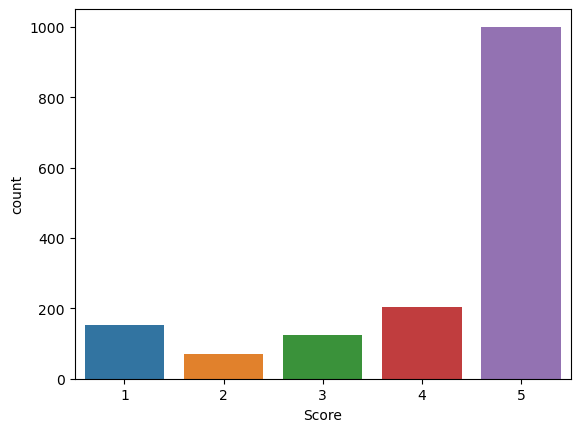

In [98]:
sns.countplot(data = df, x = 'Score')

### Dropping null values

In [113]:
reviews = df

reviews.dropna(inplace=True)

In [114]:
score_1 = reviews[reviews['Score'] == 1]
score_2 = reviews[reviews['Score'] == 2]
score_3 = reviews[reviews['Score'] == 3]
score_4 = reviews[reviews['Score'] == 4]
score_5 = reviews[reviews['Score'] == 5]

In [115]:
reviews_sample = pd.concat([score_1,score_2,score_3,score_4,score_5],axis=0)
reviews_sample.reset_index(drop=True,inplace=True)

#### Generating Word Cloud from Reviews Summary &
#### Display the Word Cloud using matplotlib


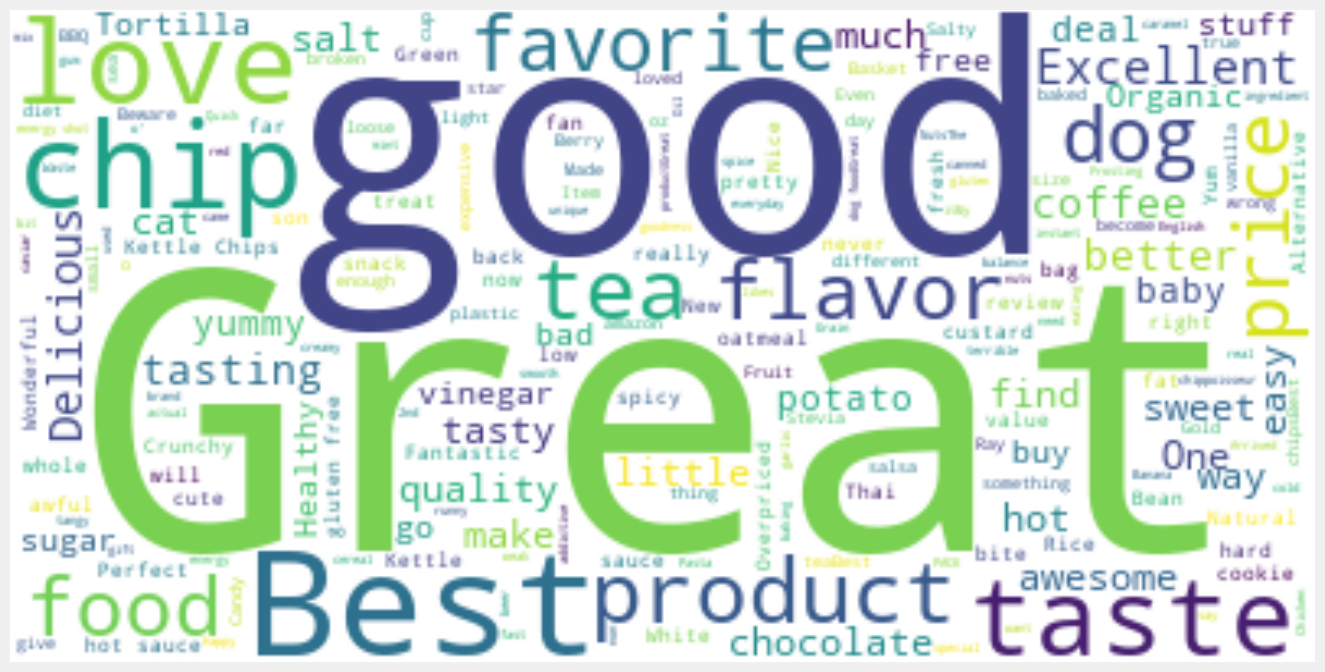

In [139]:
reviews_str = reviews_sample.Summary.str.cat()
wordcloud = WordCloud(background_color='white').generate(reviews_str)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis("off")
plt.show()

### Filter negative and positive reviews

In [116]:
negative_reviews = reviews_sample[reviews_sample['Score'].isin([1,2]) ]
positive_reviews = reviews_sample[reviews_sample['Score'].isin([4,5]) ]

negative_reviews_str = negative_reviews.Summary.str.cat()
positive_reviews_str = positive_reviews.Summary.str.cat()

### Generate Word Clouds for Negative and Positive Reviews

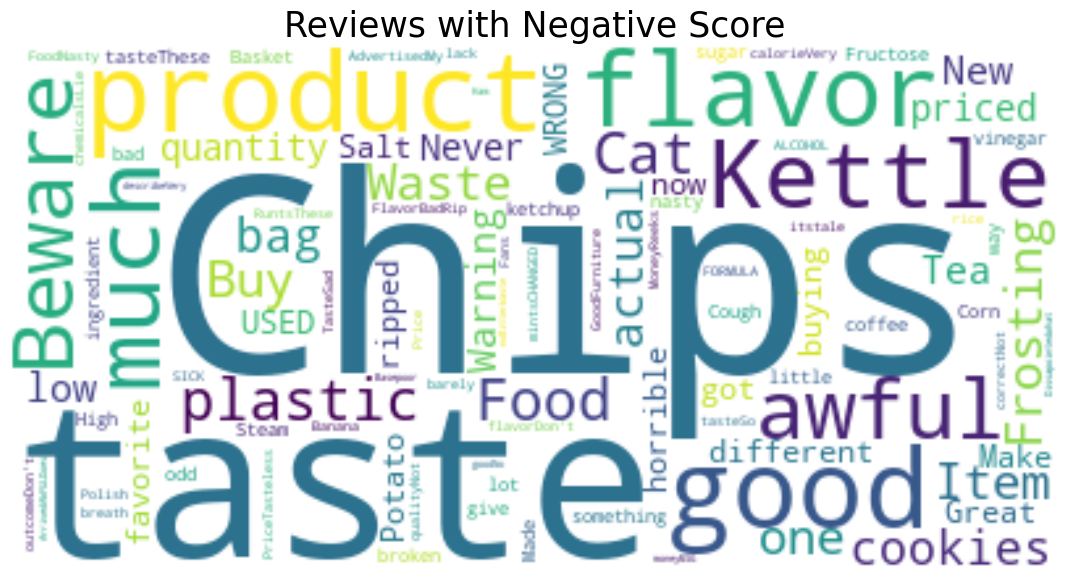

In [120]:
wordcloud_negative = WordCloud(background_color='white').generate(negative_reviews_str)
wordcloud_positive = WordCloud(background_color='black').generate(positive_reviews_str)

fig = plt.figure(figsize=(15, 15))
ax1 = fig.add_subplot(211)
ax1.imshow(wordcloud_negative, interpolation='bilinear')
ax1.axis("off")
ax1.set_title('Reviews with Negative Score', fontsize=25)

plt.show()

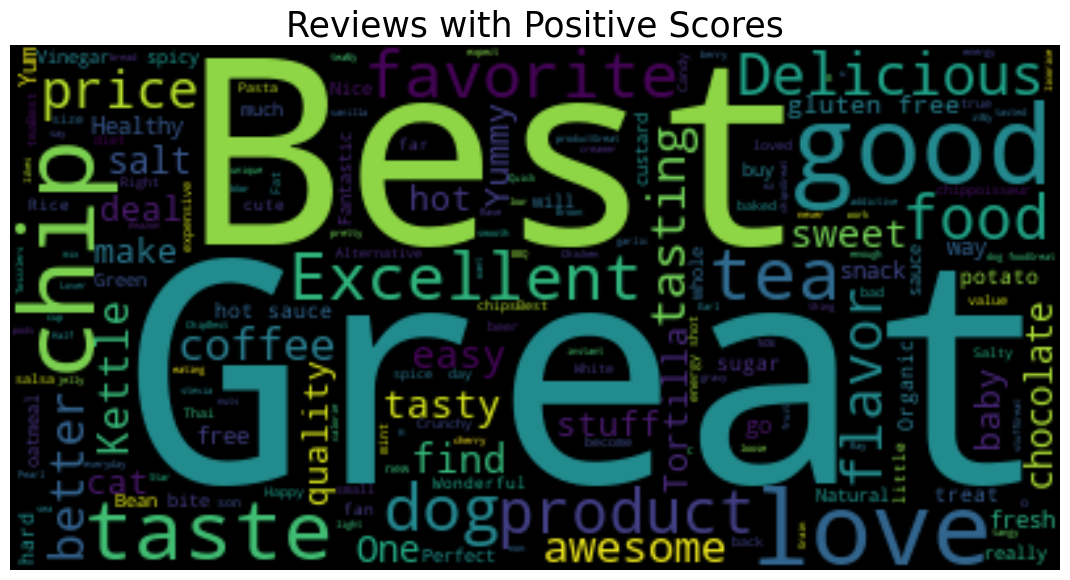

In [122]:
fig = plt.figure(figsize=(15, 15)) 
ax2 = fig.add_subplot(212)
ax2.imshow(wordcloud_positive, interpolation='bilinear')
ax2.axis("off")
ax2.set_title('Reviews with Positive Scores', fontsize=25)
plt.show()

In [123]:
!pip install vaderSentiment

     ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
     ------ ------------------------------ 20.5/126.0 kB 131.3 kB/s eta 0:00:01
     ------------ ------------------------ 41.0/126.0 kB 196.9 kB/s eta 0:00:01
     ------------------ ------------------ 61.4/126.0 kB 273.8 kB/s eta 0:00:01
     --------------------------- --------- 92.2/126.0 kB 375.8 kB/s eta 0:00:01
     -----------------------------------  122.9/126.0 kB 481.4 kB/s eta 0:00:01
     ------------------------------------ 126.0/126.0 kB 411.8 kB/s eta 0:00:00


In [129]:
import seaborn as sns
import re
import os
import sys
import ast
plt.style.use('fivethirtyeight')

cp = sns.color_palette()
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [130]:
emptyline=[]
for row in df['Text']:
    
    vs=analyzer.polarity_scores(row)
    emptyline.append(vs)
    
df_sentiments=pd.DataFrame(emptyline)
df_sentiments.head()

,neg,neu,pos,compound
0,0.000,0.517,0.483,0.9413
1,0.258,0.644,0.099,-0.5719
2,0.126,0.623,0.250,0.7880
3,0.000,0.868,0.132,0.4404
4,0.000,0.455,0.545,0.9186


In [133]:
df_c = pd.concat([df.reset_index(drop=True), df_sentiments], axis=1)
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great staff great price. wide assortment mummy...,0.000,0.455,0.545,0.9186


In [134]:
df_c['Sentiment'] = np.where(df_c['compound'] >= 0 , 'Positive','Negative')
df_c.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,neg,neu,pos,compound,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,bought several vitality canned dog food produc...,0.000,0.517,0.483,0.9413,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,product arrived labelled lumbo halted peanuts....,0.258,0.644,0.099,-0.5719,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all","connection around centuries. light, pillow cit...",0.126,0.623,0.250,0.7880,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,looking secret ingredient robitussin believe f...,0.000,0.868,0.132,0.4404,Positive
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,great staff great price. wide assortment mummy...,0.000,0.455,0.545,0.9186,Positive


### Visualize the result

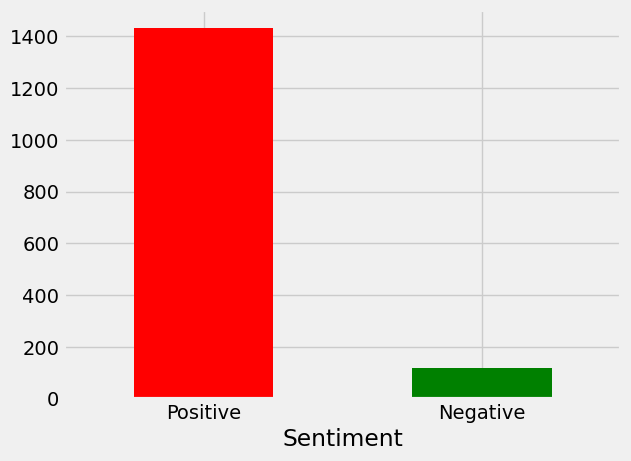

In [140]:
result=df_c['Sentiment'].value_counts()
result.plot(kind='bar', rot=0, color=['red','green']);